In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import tensorflow as tf

In [2]:
#读取数据集
train = pd.read_csv('./cnews/train.tsv',sep='\t',header=None,names=['label','content'])
val = pd.read_csv('./cnews/dev.tsv',sep='\t',header=None,names=['label','content'])
test = pd.read_csv('./cnews/test.tsv',sep='\t',header=None,names=['label','content'])

In [139]:
train.shape

(50000, 2)

In [140]:
val.shape

(5000, 2)

In [141]:
test.shape

(10000, 2)

In [3]:
train['content'][0]

'马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有摆脱雨水的困扰。7月31日下午6点，国奥队的日常训练再度受到大雨的干扰，无奈之下队员们只慢跑了25分钟就草草收场。31日上午10点，国奥队在奥体中心外场训练的时候，天就是阴沉沉的，气象预报显示当天下午沈阳就有大雨，但幸好队伍上午的训练并没有受到任何干扰。下午6点，当球队抵达训练场时，大雨已经下了几个小时，而且丝毫没有停下来的意思。抱着试一试的态度，球队开始了当天下午的例行训练，25分钟过去了，天气没有任何转好的迹象，为了保护球员们，国奥队决定中止当天的训练，全队立即返回酒店。在雨中训练对足球队来说并不是什么稀罕事，但在奥运会即将开始之前，全队变得“娇贵”了。在沈阳最后一周的训练，国奥队首先要保证现有的球员不再出现意外的伤病情况以免影响正式比赛，因此这一阶段控制训练受伤、控制感冒等疾病的出现被队伍放在了相当重要的位置。而抵达沈阳之后，中后卫冯萧霆就一直没有训练，冯萧霆是7月27日在长春患上了感冒，因此也没有参加29日跟塞尔维亚的热身赛。队伍介绍说，冯萧霆并没有出现发烧症状，但为了安全起见，这两天还是让他静养休息，等感冒彻底好了之后再恢复训练。由于有了冯萧霆这个例子，因此国奥队对雨中训练就显得特别谨慎，主要是担心球员们受凉而引发感冒，造成非战斗减员。而女足队员马晓旭在热身赛中受伤导致无缘奥运的前科，也让在沈阳的国奥队现在格外警惕，“训练中不断嘱咐队员们要注意动作，我们可不能再出这样的事情了。”一位工作人员表示。从长春到沈阳，雨水一路伴随着国奥队，“也邪了，我们走到哪儿雨就下到哪儿，在长春几次训练都被大雨给搅和了，没想到来沈阳又碰到这种事情。”一位国奥球员也对雨水的“青睐”有些不解。'

In [4]:
train.shape

(50000, 2)

In [5]:
import jieba
def content_cut(x):
    x = jieba.lcut(x) ["asd","da"]
    x = " ".join(x)
    return x

In [6]:
train['content'] = train['content'].map(lambda x: content_cut(x))
val['content'] = val['content'].map(lambda x: content_cut(x))
test['content'] = test['content'].map(lambda x: content_cut(x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hcq\AppData\Local\Temp\jieba.cache
Loading model cost 1.161 seconds.
Prefix dict has been built successfully.


In [7]:
df = pd.concat([train,val,test],axis=0)

In [8]:
df['content_len'] = df['content'].map(lambda x:len(x.split(" ")))

In [9]:
np.percentile(df['content_len'].values,80)

768.0

In [9]:
#数据分析


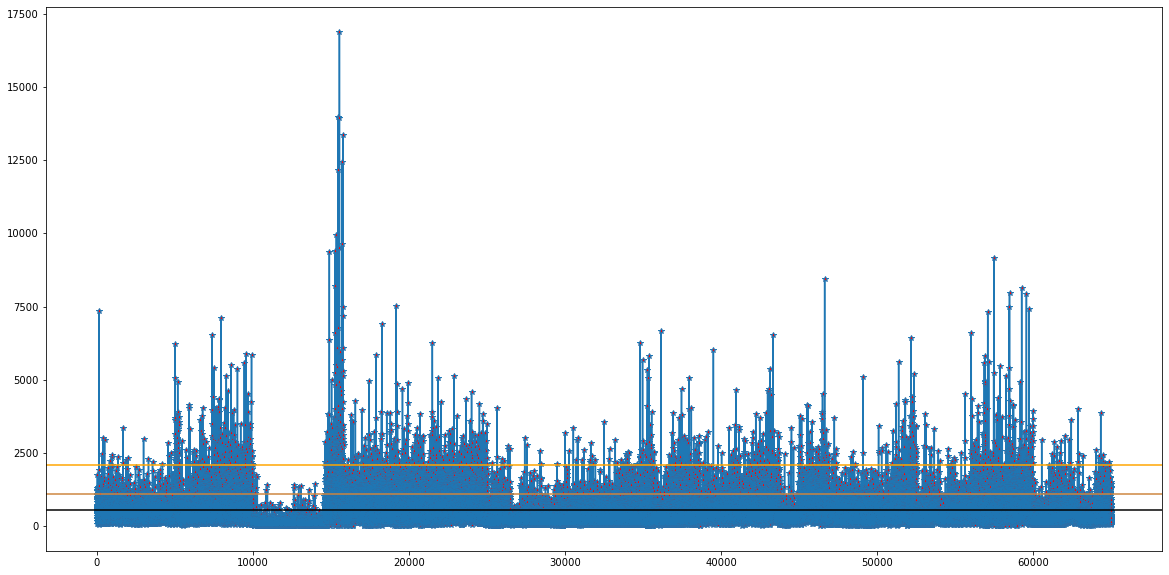

In [64]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(df['content_len'].tolist(),marker='*',markerfacecolor='red')
plt.axhline(y=np.mean(df['content_len'].tolist()),color="black",)
plt.axhline(y=np.percentile(df['content_len'].values,90),color="peru")
plt.axhline(y=np.percentile(df['content_len'].values,98),color="orange")

Text(0.5, 0, '类别名称')

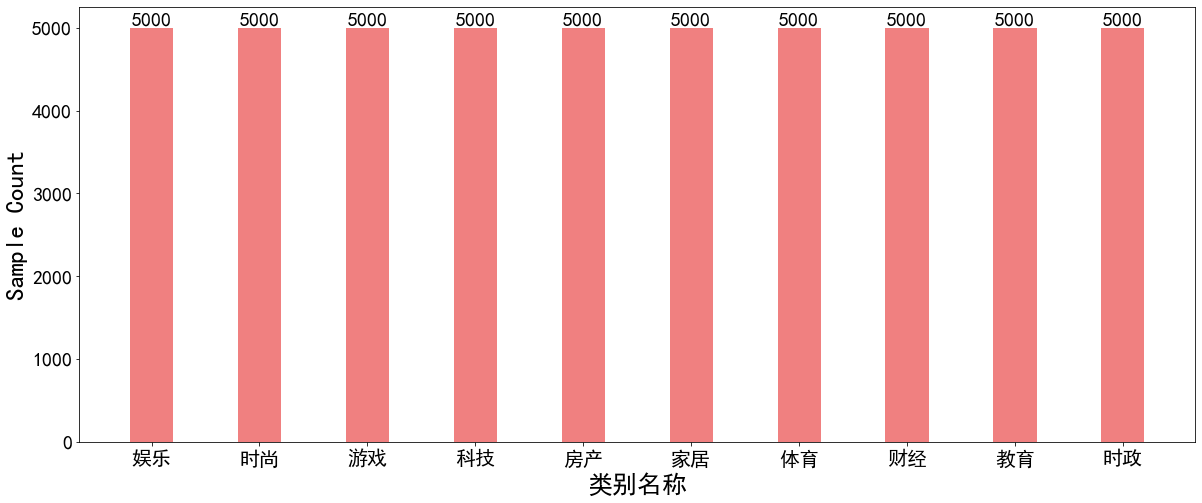

In [81]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
count_class = train['label'].value_counts()
plt.figure(figsize=(20,8))
class_bar = plt.bar(x=count_class.index, height=count_class.tolist(),width=0.4,color='lightcoral')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for bar in class_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=20)

plt.ylabel("Sample Count",fontsize=25)
plt.xlabel("类别名称",fontsize=25)

In [10]:
import os 
file_name = './embedding/Word2Vec_word_200.model'
if not os.path.exists(file_name):
    model = Word2Vec([document.split(' ')for document in df['content'].values],
                     size=200, 
                     window=5,
                     iter=10, 
                     workers=11, 
                     seed=2018, 
                     min_count=2)

    model.save(file_name)
else:
    model = Word2Vec.load(file_name)
print("add word2vec finished....")

add word2vec finished....


In [11]:
train['content'][0]

'马晓旭 意外 受伤 让 国奥 警惕   无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳 报道   来到 沈阳 ， 国奥队 依然 没有 摆脱 雨水 的 困扰 。 7 月 31 日 下午 6 点 ， 国奥队 的 日常 训练 再度 受到 大雨 的 干扰 ， 无奈 之下 队员 们 只 慢跑 了 25 分钟 就 草草收场 。 31 日 上午 10 点 ， 国奥队 在 奥体中心 外场 训练 的 时候 ， 天 就是 阴沉沉 的 ， 气象预报 显示 当天 下午 沈阳 就 有 大雨 ， 但 幸好 队伍 上午 的 训练 并 没有 受到 任何 干扰 。 下午 6 点 ， 当 球队 抵达 训练场 时 ， 大雨 已经 下 了 几个 小时 ， 而且 丝毫 没有 停下来 的 意思 。 抱 着 试一试 的 态度 ， 球队 开始 了 当天 下午 的 例行 训练 ， 25 分钟 过去 了 ， 天气 没有 任何 转好 的 迹象 ， 为了 保护 球员 们 ， 国奥队 决定 中止 当天 的 训练 ， 全队 立即 返回 酒店 。 在 雨 中 训练 对 足球队 来说 并 不是 什么 稀罕 事 ， 但 在 奥运会 即将 开始 之前 ， 全队 变得 “ 娇贵 ” 了 。 在 沈阳 最后 一周 的 训练 ， 国奥队 首先 要 保证 现有 的 球员 不再 出现意外 的 伤病 情况 以免 影响 正式 比赛 ， 因此 这一 阶段 控制 训练 受伤 、 控制 感冒 等 疾病 的 出现 被 队伍 放在 了 相当 重要 的 位置 。 而 抵达 沈阳 之后 ， 中 后卫 冯萧霆 就 一直 没有 训练 ， 冯萧霆 是 7 月 27 日 在 长春 患上 了 感冒 ， 因此 也 没有 参加 29 日 跟 塞尔维亚 的 热身赛 。 队伍 介绍 说 ， 冯萧霆 并 没有 出现 发烧 症状 ， 但 为了 安全 起 见 ， 这 两天 还是 让 他 静养 休息 ， 等 感冒 彻底 好 了 之后 再 恢复 训练 。 由于 有 了 冯萧霆 这个 例子 ， 因此 国奥队 对雨中 训练 就 显得 特别 谨慎 ， 主要 是 担心 球员 们 受凉 而 引发 感冒 ， 造成 非战斗 减员 。 而 女足 队员 马晓旭 在 热身赛 中 受伤 导致 无缘 奥运 的 前科 ， 也 让 在 沈阳 的 国奥队 现在 格外 警惕 ， “ 训练 中 不断 嘱咐 队员 

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=50000, 
                                                  lower=False,filters="")
tokenizer.fit_on_texts(df['content'].tolist())

train_ = tokenizer.texts_to_sequences(train['content'].values)
val_ = tokenizer.texts_to_sequences(val['content'].values)
test_ = tokenizer.texts_to_sequences(test['content'].values)

In [ ]:
train_ = tf.keras.preprocessing.sequence.pad_sequences(train_, maxlen=800)
val_ = tf.keras.preprocessing.sequence.pad_sequences(val_, maxlen=800)
test_ = tf.keras.preprocessing.sequence.pad_sequences(test_, maxlen=800)

In [13]:
#Word Embedding

In [14]:
word_vocab = tokenizer.word_index
count = 0

embedding_matrix = np.zeros((len(word_vocab) + 1, 200))
for word, i in word_vocab.items():
    embedding_vector = model.wv[word] if word in model else None
    if embedding_vector is not None:
        count += 1
        embedding_matrix[i] = embedding_vector
    else:
        unk_vec = np.random.random(200) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_matrix[i] = unk_vec

d:\miniconda3\envs\tf2.0\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


In [15]:
train.head()

,label,content
0,体育,马晓旭 意外 受伤 让 国奥 警惕 无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳...
1,体育,商瑞华 首战 复仇 心切 中国 玫瑰 要 用 美国 方式 攻克 瑞典 多曼来 了 ， 瑞...
2,体育,冠军 球队 迎新 欢乐 派对 黄旭获 大奖 张军 赢 下 PK 赛 新浪 体育讯 12 ...
3,体育,辽足 签约 危机 引 注册 难关 高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 2 月 ...
4,体育,揭秘 谢亚龙 被 带走 ： 总局 电话 骗局 复制 南杨 轨迹 体坛周报 特约记者 张锐...


In [16]:
#label 编码
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
train_label = lb.fit_transform(train['label'].values)
val_label = lb.transform(val['label'].values)
test_label = lb.transform(test['label'].values)

In [17]:
#建模
(batch,800)
(batch,800,200)

In [18]:
content = tf.keras.layers.Input(shape=(800), dtype='int32')
embedding = tf.keras.layers.Embedding(
    name="word_embedding",
    input_dim=embedding_matrix.shape[0],
    weights=[embedding_matrix],
    output_dim=embedding_matrix.shape[1],
    trainable=False)

x = tf.keras.layers.SpatialDropout1D(0.2)(embedding(content))

#编码层
#bi-GRU
#bi-GRU
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200, return_sequences=True))(x)  #（batch,800,400）
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200, return_sequences=True))(x)

#池化层
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(x) #（batch,400）
max_pool = tf.keras.layers.GlobalMaxPooling1D()(x)#(batch,400)

conc = tf.keras.layers.concatenate([avg_pool, max_pool])

x = tf.keras.layers.Dense(1000)(conc)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(500)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation="relu")(x)
x = tf.keras.layers.Dense(10)(x)
output = tf.nn.softmax(x)

model = tf.keras.models.Model(inputs=content, outputs=output)



In [19]:
train_label

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
len(train_[0])

429

In [23]:
train_label = tf.keras.utils.to_categorical(train_label,num_classes=10,dtype='int')
val_label = tf.keras.utils.to_categorical(val_label,num_classes=10,dtype='int')
test_label = tf.keras.utils.to_categorical(test_label,num_classes=10,dtype='int')

In [24]:
train_label.shape

(50000, 10)

In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_,train_label))

In [26]:
train_label

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [39]:
train_dataset = train_dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size = 23000)    
train_dataset = train_dataset.batch(batch_size=128)

In [40]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_,val_label))
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=23000)    
val_dataset = val_dataset.batch(batch_size=256)


In [41]:
for a,b in train_dataset.take(1):
    print(a.shape,b.shape)

(128, 800) (128, 10)


In [42]:
learning_rate = 0.001

loss_object = tf.keras.losses.CategoricalCrossentropy()


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

#mini-batch
def train_one_step(contents, labels):
    with tf.GradientTape() as tape:
        predictions = model(contents)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss) #update
    train_accuracy(labels, predictions)#update


def test_one_step(contents, labels):
    predictions = model(contents)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)



In [43]:
EPOCHS=10
for epoch in range(EPOCHS):
    # 在下一个epoch开始时，重置评估指标
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for content, labels in train_dataset:
        train_one_step(content, labels) #mini-batch 更新

    for val_content, val_labels in val_dataset:
        test_one_step(val_content, val_labels)

    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100
                         ))


Epoch 1, Loss: 0.20004434883594513, Accuracy: 94.01599884033203, Test Loss: 0.10956119000911713, Test Accuracy: 97.15999603271484
Epoch 2, Loss: 0.062420666217803955, Accuracy: 98.08200073242188, Test Loss: 0.09901873022317886, Test Accuracy: 97.27999877929688
Epoch 3, Loss: 0.04399212822318077, Accuracy: 98.63999938964844, Test Loss: 0.09408794343471527, Test Accuracy: 97.29999542236328
Epoch 4, Loss: 0.03446725383400917, Accuracy: 98.87200164794922, Test Loss: 0.12983272969722748, Test Accuracy: 96.83999633789062
Epoch 5, Loss: 0.028765583410859108, Accuracy: 99.11000061035156, Test Loss: 0.11720480024814606, Test Accuracy: 97.25999450683594
Epoch 6, Loss: 0.020870191976428032, Accuracy: 99.35600280761719, Test Loss: 0.11674028635025024, Test Accuracy: 97.29999542236328
Epoch 7, Loss: 0.018076613545417786, Accuracy: 99.4280014038086, Test Loss: 0.15874414145946503, Test Accuracy: 96.45999908447266
Epoch 8, Loss: 0.015492483973503113, Accuracy: 99.5060043334961, Test Loss: 0.119772508

In [143]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 800)]        0                                            
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 800, 200)     82703200    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 800, 200)     0           word_embedding[0][0]             
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 800, 400)     482400      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [62]:
model(tf.constant([test_[1]]))

<tf.Tensor: id=3682937, shape=(1, 10), dtype=float32, numpy=
array([[1.0000000e+00, 3.1490074e-11, 9.4406474e-17, 1.0289336e-14,
        5.9060578e-14, 4.8893082e-16, 1.5400805e-16, 2.4614913e-13,
        1.4353953e-12, 9.7358359e-16]], dtype=float32)>

In [63]:
test_label[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_) 
test_dataset = test_dataset.batch(batch_size=256)


In [112]:
predictions=[]
for line in test_dataset:
    prediction = model(line)
    predictions.extend(list(np.argmax(prediction.numpy(),axis=1)))

In [113]:
test_.shape

(10000, 800)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
test_true = list(np.argmax(test_label,axis=1))

In [116]:
accuracy_score(test_true,predictions)

0.9827

In [120]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(test_true,predictions,target_names=list(lb.classes_)))

              precision    recall  f1-score   support

          体育       1.00      1.00      1.00      1000
          娱乐       0.99      0.99      0.99      1000
          家居       0.99      0.94      0.96      1000
          房产       1.00      1.00      1.00      1000
          教育       0.99      0.95      0.97      1000
          时尚       0.98      0.99      0.98      1000
          时政       0.98      0.98      0.98      1000
          游戏       0.99      0.99      0.99      1000
          科技       0.95      1.00      0.97      1000
          财经       0.97      0.99      0.98      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



['体育', '娱乐', '家居', '房产', '教育', '时尚', '时政', '游戏', '科技', '财经']